In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df_dist = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\dist_matrix.csv") 

In [3]:
df_dist = df_dist.iloc[: , 1:]

In [4]:
tril=np.tril(df_dist)

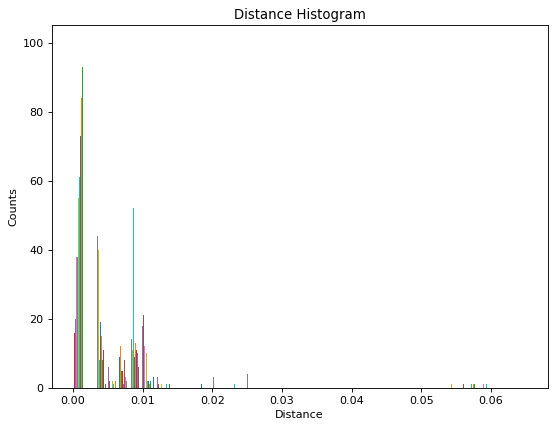

In [11]:
figure(figsize=(8, 6), dpi=80)
hist=plt.hist(tril,bins=40)
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.title('Distance Histogram')
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist_max")

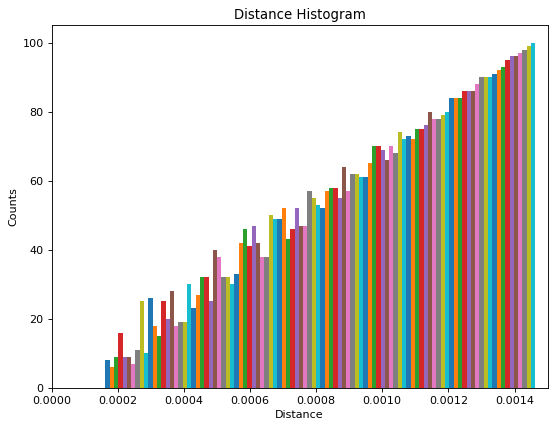

In [6]:
figure(figsize=(8, 6), dpi=80)
hist=plt.hist(tril,bins=40)
plt.xlabel('Distance')
plt.ylabel('Counts')
plt.xlim(0,0.0015)
plt.title('Distance Histogram')
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist")

We can see that the highest peak occurs at a distance of about 0.00145. Thus, we will make this our cutoff for 'closely relatedness.'

In [7]:
for i in range(0,len(df_dist.columns)): #len(df_dist.columns)
    df_dist.loc[df_dist[df_dist.columns[i]]>0.00145,df_dist.columns[i]] = ''

In [8]:
df_close=df_dist

In [9]:
df_close

,18942,1053,36653,35906,24887,40959,19451,16248,17887,44480,...,29295,20565,22234,31939,40447,22779,40560,37248,6454,38985
0,0.0,,0.000044,,,,,,,,...,,,,,,,,,,0.000036
1,,0.0,,,,,,,,,...,,,,,,,,,,
2,0.000044,,0.0,,,,,,,,...,,,,,,,,,,0.000037
3,,,,0.0,,,,,,,...,,0.000082,,,,,,,,
4,,,,,0.0,,,0.000158,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,,,,,,,,,,,...,,,,,,0.0,,,,
96,,,,,,,,,,,...,,,,,,,0.0,,,
97,,,,,,,,,0.000211,,...,,,,,0.000189,,,0.0,,
98,,,,,,,,,,,...,,,,0.000084,,,,,0.0,


We now have a matrix with the closely related strains, ignoring the cells that have 0.0, as those are strains that are completely identical.

In [ ]:
df_close.to_csv(r"C:\Users\jojoa\GitHub\staph\data\closely_related_matrix.csv")